# Imports

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix,f1_score


# Phase 0

**Read in Phase 0 CSV file**

In [26]:
df = pd.read_csv('Phase 0 .csv')

In [27]:
def plotResults(questions, yes_percentages, no_percentages, labels=["Yes", "No"], title="Yes vs No Responses", save_path=None):
    """
    Create a grouped bar chart and automatically save it to a file if no save_path is provided.

    Args:
        questions (list): List of question texts.
        yes_percentages (list): List of Yes (or Correct) percentages.
        no_percentages (list): List of No (or Incorrect) percentages.
        labels (list): List of two labels (default ["Yes", "No"]).
        title (str): Plot title.
        save_path (str): Optional. If None, saves automatically based on title.
    """

    x = range(len(questions))
    width = 0.35

    fig, ax = plt.subplots(figsize=(14, 7))
    bars1 = ax.bar(x, yes_percentages, width, label=labels[0], color="#4CAF50")
    bars2 = ax.bar([i + width for i in x], no_percentages, width, label=labels[1], color="#F44336")

    for bar in bars1 + bars2:
        height = bar.get_height()
        if height > 85:
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height - 5),
                        xytext=(0, 0),
                        textcoords="offset points",
                        ha='center', va='top',
                        fontsize=9,
                        color='white')
        else:
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 5),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9)

    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(questions, rotation=30, ha="right")
    ax.legend()

    plt.tight_layout()

    # 🛠 Auto-save if no save_path given
    if save_path is None:
        # Create a filename from the title (remove spaces and special characters)
        filename = re.sub(r'[^A-Za-z0-9]+', '_', title)
        save_path = f"{filename}.png"

    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved automatically as: {save_path}")

    plt.show()

Plot saved automatically as: Phase_0_Proportion_of_Students_Answering_Yes_.png


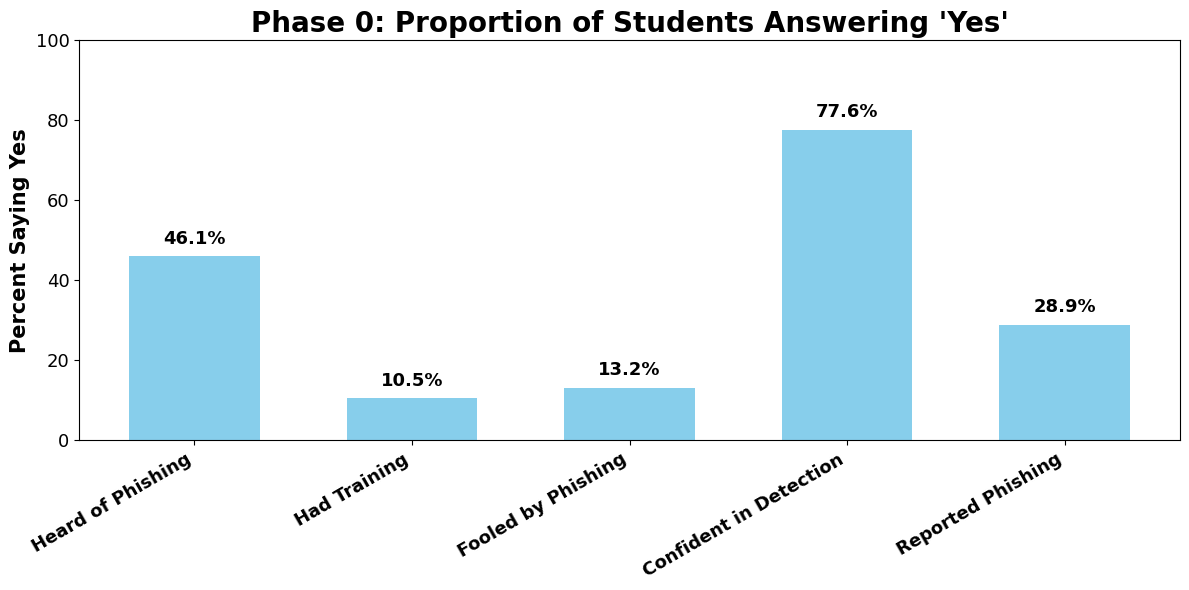

In [28]:
# Yes/No question columns
yes_no_questions = [
    'Have you heard the term “phishing” before?',
    'Have you ever done phishing training? ',
    'Have you ever been fooled by a phishing email? ',
    ' Are you confident that you will be able to identify any type of phishing email? ',
    ' Have you ever reported phishing emails? '
]

# Shortened question labels for the chart
short_titles = {
    'Have you heard the term “phishing” before?': 'Heard of Phishing',
    'Have you ever done phishing training? ': 'Had Training',
    'Have you ever been fooled by a phishing email? ': 'Fooled by Phishing',
    ' Are you confident that you will be able to identify any type of phishing email? ': 'Confident in Detection',
    ' Have you ever reported phishing emails? ': 'Reported Phishing'
}

# Store Yes percentages
plot_data = {}
for question in yes_no_questions:
    yes_count = (df[question].str.strip().str.lower() == "yes").sum()
    no_count = (df[question].str.strip().str.lower() == "no").sum()
    total = yes_count + no_count
    if total > 0:
        yes_percent = (yes_count / total) * 100
        plot_data[short_titles[question]] = yes_percent

# Prepare data
questions = list(plot_data.keys())
yes_values = [plot_data[q] for q in questions]

# Plotting all in one block
x = range(len(questions))
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, yes_values, color="#87CEEB", width=0.6)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 6),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=13, fontweight='bold')

# Style the axes and title
ax.set_ylabel('Percent Saying Yes', fontsize=15, fontweight='bold')
ax.set_title("Phase 0: Proportion of Students Answering 'Yes'", fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(questions, rotation=30, ha="right", fontsize=13, fontweight='bold')
ax.set_yticks(range(0, 101, 20))
ax.tick_params(axis='y', labelsize=13)
ax.set_ylim(0, 100)

plt.tight_layout()

# Save the plot
filename = re.sub(r'[^A-Za-z0-9]+', '_', "Phase 0: Proportion of Students Answering 'Yes'")
save_path = f"{filename}.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Plot saved automatically as: {save_path}")

plt.show()

Plot saved automatically as: Phase_0_Correct_Responses_to_MCQs.png


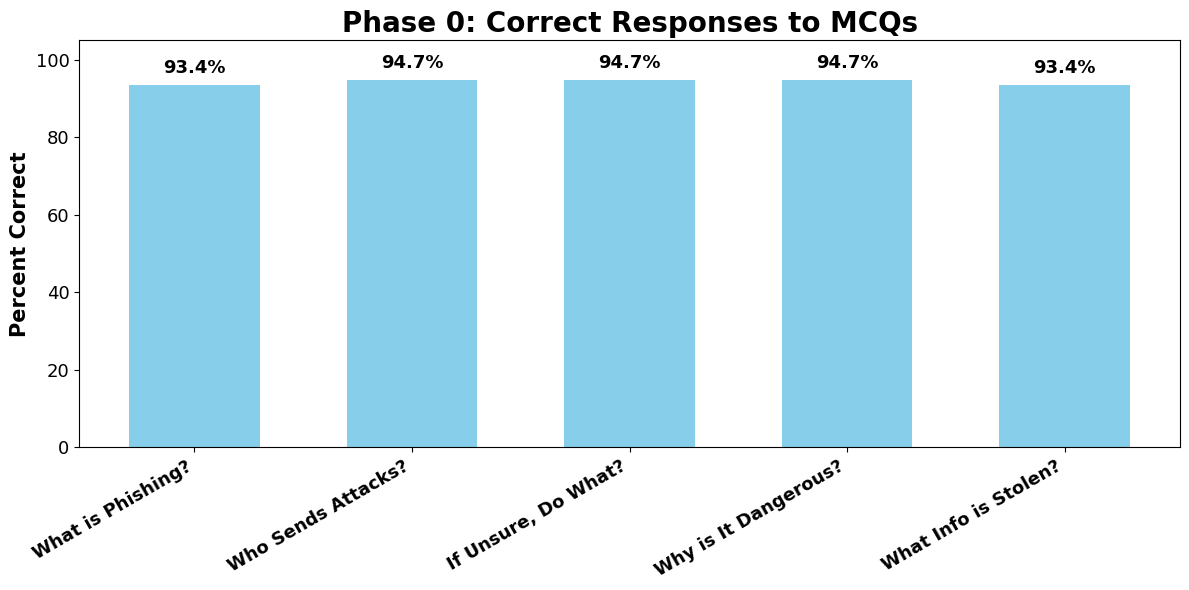

In [31]:
# Multiple choice questions and correct answers
mcq_questions = {
    'What do you think phishing is?': 'Type of online scam that tricks people into giving away personal information',
    'Who usually sends phishing attacks?': 'Hackers or scammers',
    'What should you do if you are not sure about a message or website?': 'Ask a trusted adult for help',
    'Why is phishing dangerous?': 'It can trick people into giving away personal information',
    'What kind of information do you think phishing attacks try to steal?': 'Passwords and personal information'
}

# Shortened titles for plot
short_mcq_titles = {
    'What do you think phishing is?': 'What is Phishing?',
    'Who usually sends phishing attacks?': 'Who Sends Attacks?',
    'What should you do if you are not sure about a message or website?': 'If Unsure, Do What?',
    'Why is phishing dangerous?': 'Why is It Dangerous?',
    'What kind of information do you think phishing attacks try to steal?': 'What Info is Stolen?'
}

# Normalize column names in the DataFrame
df.columns = df.columns.str.strip()

# Store correct percentages
mcq_plot_data = {}

# Calculate correct percentages
for question, correct_answer in mcq_questions.items():
    if question in df.columns:
        correct_count = (df[question] == correct_answer).sum()
        total_responses = df[question].notna().sum()
        if total_responses > 0:
            correct_percent = (correct_count / total_responses) * 100
            mcq_plot_data[short_mcq_titles[question]] = correct_percent
    else:
        print(f"Warning: Question not found in DataFrame: {question}")

# Prepare data
questions = list(mcq_plot_data.keys())
correct_values = [mcq_plot_data[q] for q in questions]

# Plot
x = range(len(questions))
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, correct_values, color="#87CEEB", width=0.6)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 6),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=13, fontweight='bold')

# Style
ax.set_ylabel('Percent Correct', fontsize=15, fontweight='bold')
ax.set_title("Phase 0: Correct Responses to MCQs", fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(questions, rotation=30, ha="right", fontsize=13, fontweight='bold')
ax.set_yticks(range(0, 101, 20))
ax.tick_params(axis='y', labelsize=13)
ax.set_ylim(0, 105)

plt.tight_layout()

# Save
filename = re.sub(r'[^A-Za-z0-9]+', '_', "Phase 0: Correct Responses to MCQs")
save_path = f"{filename}.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Plot saved automatically as: {save_path}")

plt.show()

Available columns: ['Timestamp', 'Total score', 'Have you heard the term “phishing” before?', 'Have you heard the term “phishing” before? [Score]', 'Have you heard the term “phishing” before? [Feedback]', 'What do you think phishing is?', 'What do you think phishing is? [Score]', 'What do you think phishing is? [Feedback]', 'Have you ever done phishing training?', 'Have you ever done phishing training?  [Score]', 'Have you ever done phishing training?  [Feedback]', 'Who usually sends phishing attacks?', 'Who usually sends phishing attacks? [Score]', 'Who usually sends phishing attacks? [Feedback]', 'What should you do if you are not sure about a message or website?', 'What should you do if you are not sure about a message or website? [Score]', 'What should you do if you are not sure about a message or website? [Feedback]', 'Why is phishing dangerous?', 'Why is phishing dangerous? [Score]', 'Why is phishing dangerous? [Feedback]', 'What kind of information do you think phishing attacks 

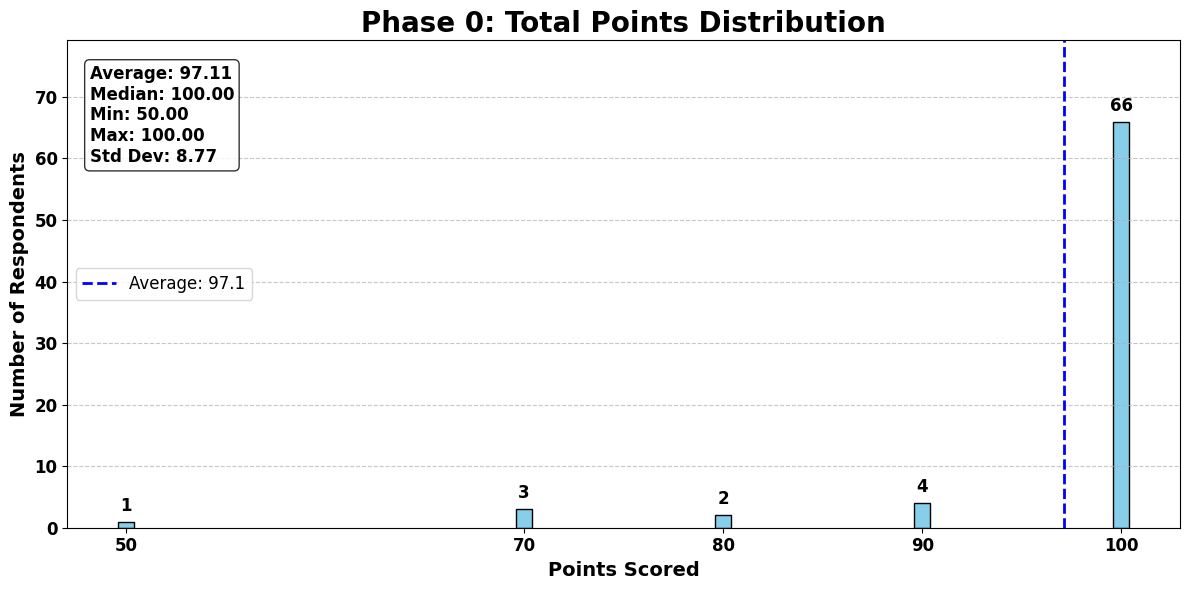

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Normalize column names
df.columns = df.columns.str.strip()

# 🔍 Check for the actual column name
print("Available columns:", df.columns.tolist())

# Auto-detect score column with "total"
score_col = [col for col in df.columns if 'total' in col.lower() and '/' in str(df[col].iloc[0])][0]

# Clean the total score
df['Earned Score'] = df[score_col].apply(lambda x: float(str(x).split('/')[0].strip()))
earned_scores = df['Earned Score']

# Calculate statistics
average_score = earned_scores.mean()
median_score = earned_scores.median()
min_score = earned_scores.min()
max_score = earned_scores.max()
std_dev_score = earned_scores.std()

# Prepare data for bar plot
score_counts = earned_scores.value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(score_counts.index, score_counts.values, color='#87CEEB', edgecolor='black')

# Titles and labels
plt.title('Phase 0: Total Points Distribution', fontsize=20, fontweight='bold')
plt.xlabel('Points Scored', fontsize=14, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=14, fontweight='bold')
plt.xticks(score_counts.index, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Extend Y-axis limit for annotation headroom
max_height = max(score_counts.values)
plt.ylim(0, max_height * 1.2)

plt.axvline(average_score, color='blue', linestyle='dashed', linewidth=2, label=f'Average: {average_score:.1f}')
plt.legend(fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, fontweight='bold')

stats_text = (
    f"Average: {average_score:.2f}\n"
    f"Median: {median_score:.2f}\n"
    f"Min: {min_score:.2f}\n"
    f"Max: {max_score:.2f}\n"
    f"Std Dev: {std_dev_score:.2f}"
)

plt.gca().text(0.02, 0.95, stats_text, transform=plt.gca().transAxes,
               fontsize=12, fontweight='bold', verticalalignment='top',
               bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.8))

plt.tight_layout()
plt.savefig('phase0_total_score_distribution.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Phase 1

**Phase 1 CSV file**

In [38]:
df_phase1 = pd.read_csv('Phase 1.csv')
# Ground truth
groundTruth = [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]  # Q1-Q12

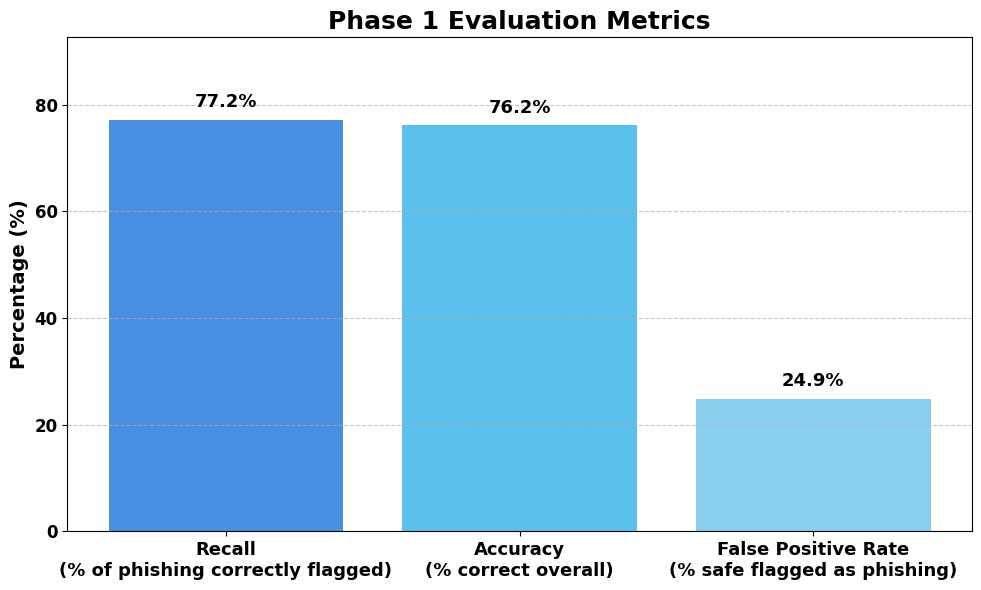

In [45]:
# STEP 2: Get student answer columns (exclude score/feedback)
student_answer_columns = [
    col for col in df_phase1.columns
    if 'Question' in col and '[Score]' not in col and '[Feedback]' not in col
][:12]

# STEP 3: Map student responses to binary (Phishing=1, Safe=0)
student_predictions = []
for col in student_answer_columns:
    mapped = df_phase1[col].apply(lambda x: 1 if str(x).strip().lower() == 'phishing' else 0)
    student_predictions.append(mapped)

# STEP 4: Create prediction matrix
student_predictions_df = pd.DataFrame(student_predictions).T
student_predictions_df.columns = [f"Q{i+1}" for i in range(12)]

# STEP 5: Expand predictions and truth for all student responses
y_true, y_pred = [], []
for _, row in student_predictions_df.iterrows():
    for i in range(12):
        y_true.append(groundTruth[i])
        y_pred.append(row[f"Q{i+1}"])

# STEP 6: Calculate metrics
recall = recall_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

tn, fp, fn, tp = cm.ravel()
false_positive_rate = fp / (fp + tn)

# STEP 7: Plot bar chart of simplified metrics
metrics = [
    'Recall\n(% of phishing correctly flagged)',
    'Accuracy\n(% correct overall)',
    'False Positive Rate\n(% safe flagged as phishing)'
]
values = [recall, accuracy, false_positive_rate]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, [v * 100 for v in values], color=['#4A90E2', '#5BC0EB', '#89CFF0'])

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 6),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=13, fontweight='bold')

# Titles and axes
plt.title('Phase 1 Evaluation Metrics', fontsize=18, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')

plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

max_val = max([v * 100 for v in values])
plt.ylim(0, max_val * 1.2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('phase1_simplified_evaluation_metrics.png', format='png', bbox_inches='tight')
plt.show()

Average Total Score: 73.11
Median Total Score: 72.00
Min Total Score: 40.00
Max Total Score: 96.00
Standard Deviation: 13.11


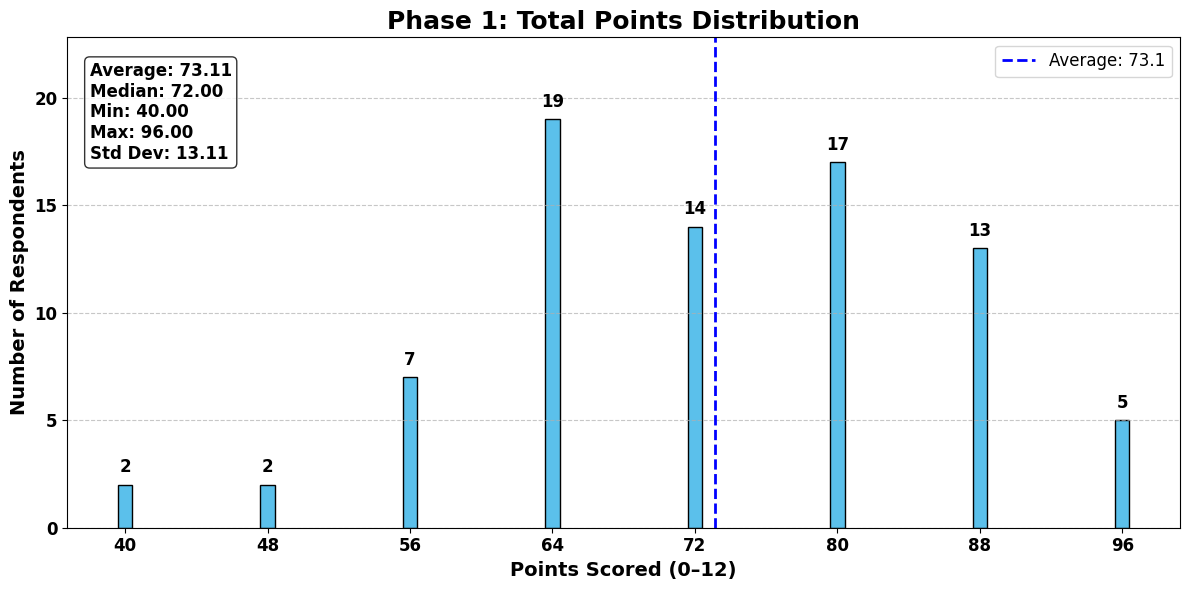

In [51]:
# Step 1: Find the [Score] columns for Q1-Q12
score_columns = [col for col in df_phase1.columns if '[Score]' in col and 'Question' in col][:12]

# Step 2: Clean and extract points earned
student_scores = []
for col in score_columns:
    cleaned_scores = df_phase1[col].apply(lambda x: float(str(x).split('/')[0].strip()))
    student_scores.append(cleaned_scores)

# Step 3: Create DataFrame (students x questions)
student_scores_df = pd.DataFrame(student_scores).T
student_scores_df.columns = [f"Q{i+1}" for i in range(12)]

# Step 4: Calculate Total Points for each student
student_scores_df['Total Points'] = student_scores_df.sum(axis=1)

# Step 5: Calculate statistics
total_points = student_scores_df['Total Points']
average_score = total_points.mean()
median_score = total_points.median()
min_score = total_points.min()
max_score = total_points.max()
std_dev_score = total_points.std()

print(f"Average Total Score: {average_score:.2f}")
print(f"Median Total Score: {median_score:.2f}")
print(f"Min Total Score: {min_score:.2f}")
print(f"Max Total Score: {max_score:.2f}")
print(f"Standard Deviation: {std_dev_score:.2f}")

# Step 6: Prepare data for bar plot
score_counts = total_points.value_counts().sort_index()

# Step 7: Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(score_counts.index, score_counts.values, color='#5BC0EB', edgecolor='black')

# Titles and axis labels (bold and large)
plt.title('Phase 1: Total Points Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Points Scored (0–12)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=14, fontweight='bold')

plt.xticks(score_counts.index, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add average line
plt.axvline(average_score, color='blue', linestyle='dashed', linewidth=2, label=f'Average: {average_score:.1f}')
plt.legend(fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 6),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, fontweight='bold')

stats_text = (
    f"Average: {average_score:.2f}\n"
    f"Median: {median_score:.2f}\n"
    f"Min: {min_score:.2f}\n"
    f"Max: {max_score:.2f}\n"
    f"Std Dev: {std_dev_score:.2f}"
)

plt.gca().text(0.02, 0.95, stats_text, transform=plt.gca().transAxes,
               fontsize=12, fontweight='bold', verticalalignment='top',
               bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.8))
plt.ylim(0, max(score_counts.values) * 1.2)
plt.tight_layout()
plt.savefig('phase1_total_score_distribution.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

Average Confidence (Correct Answers): 3.46 / 5
Average Confidence (Wrong Answers): 3.20 / 5


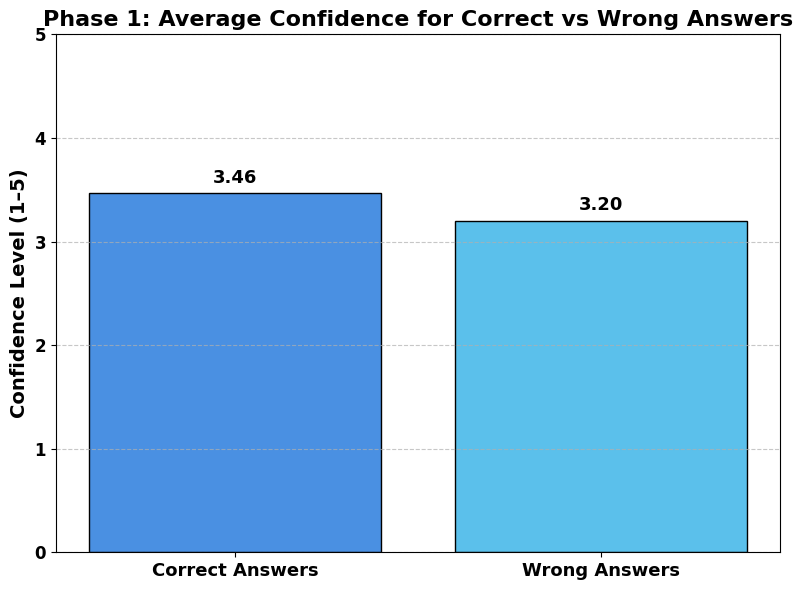

In [49]:
# Step 1: Extract only real confidence columns (no [Score])
confidence_columns = [
    col for col in df_phase1.columns
    if 'tell us how confident' in col.lower()
    and 'question' in col.lower()
    and '[score]' not in col.lower()
][:12]

# Step 2: Extract answer [Score] columns
score_columns = [
    col for col in df_phase1.columns
    if '[score]' in col.lower() and 'question' in col.lower()
][:12]

# Step 3: Clean and extract scores
student_scores = []
for col in score_columns:
    def extract_score(x):
        parts = str(x).split('/')
        if len(parts) == 2:
            earned = float(parts[0].strip())
            total = float(parts[1].strip())
            return 1 if earned == total else 0
        return 0
    cleaned = df_phase1[col].apply(extract_score)
    student_scores.append(cleaned)

# Build student_answers DataFrame
student_answers_df = pd.DataFrame(student_scores).T
student_answers_df.columns = [f"Q{i+1}" for i in range(12)]

# Step 4: Extract and clean confidence scores
student_confidence = []
for col in confidence_columns:
    def clean_confidence(x):
        try:
            first_part = str(x).split('/')[0].strip()
            return float(first_part)
        except:
            return None
    cleaned_conf = df_phase1[col].apply(clean_confidence)
    student_confidence.append(cleaned_conf)

# Build student_confidence DataFrame
student_confidence_df = pd.DataFrame(student_confidence).T
student_confidence_df.columns = [f"Q{i+1}" for i in range(12)]

# Step 5: Compare confidence for correct vs wrong answers
correct_confidences = []
wrong_confidences = []

for idx, row in student_answers_df.iterrows():
    for i in range(12):
        conf = student_confidence_df.loc[idx, f"Q{i+1}"]
        correct = row[f"Q{i+1}"]

        if pd.notna(conf):
            if correct == 1:
                correct_confidences.append(conf)
            else:
                wrong_confidences.append(conf)

# Step 6: Calculate average confidence
average_correct_confidence = sum(correct_confidences) / len(correct_confidences)
average_wrong_confidence = sum(wrong_confidences) / len(wrong_confidences)

print(f"Average Confidence (Correct Answers): {average_correct_confidence:.2f} / 5")
print(f"Average Confidence (Wrong Answers): {average_wrong_confidence:.2f} / 5")

# Step 7: Plot
labels = ['Correct Answers', 'Wrong Answers']
confidences = [average_correct_confidence, average_wrong_confidence]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, confidences, color=['#4A90E2', '#5BC0EB'], edgecolor='black')

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=13, fontweight='bold')

plt.title('Phase 1: Average Confidence for Correct vs Wrong Answers',
          fontsize=16, fontweight='bold')
plt.ylabel('Confidence Level (1–5)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save to file
plt.savefig('phase1_confidence_correct_vs_wrong.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

1 = Very low confidence (I was just guessing)

2 = Low confidence (I wasn’t sure)

3 = Medium confidence (Kind of sure)

4 = High confidence (Pretty sure)

5 = Very high confidence (I was totally confident)

Total Wrong Answers: 226
Overconfident Wrong Answers: 86
Overconfidence Rate: 38.05%


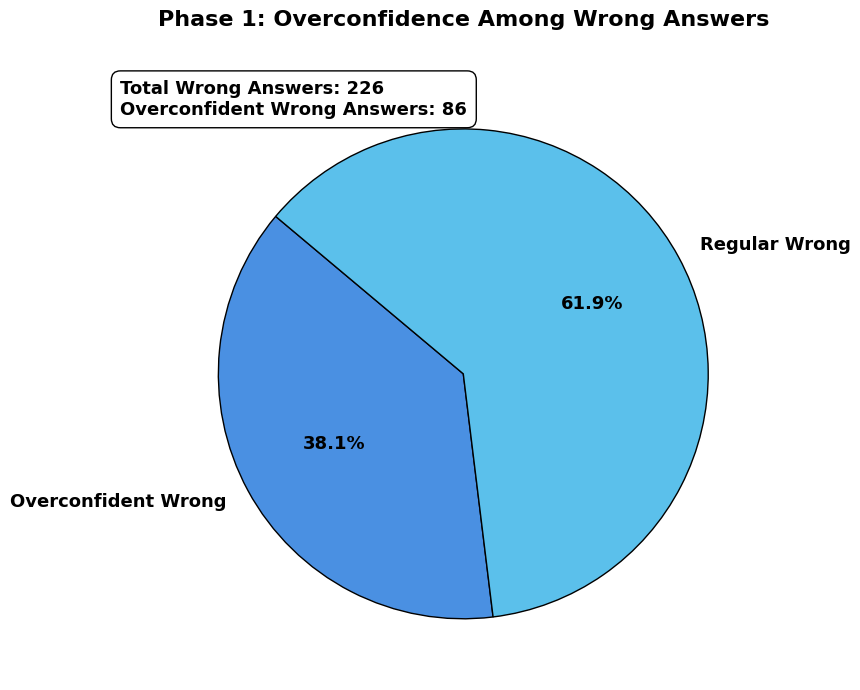

In [47]:
# Step 1: Extract only real confidence columns (no [Score])
confidence_columns = [
    col for col in df_phase1.columns
    if 'tell us how confident' in col.lower()
    and 'question' in col.lower()
    and '[score]' not in col.lower()
]

# Step 2: Extract only score columns
score_columns = [
    col for col in df_phase1.columns
    if '[score]' in col.lower() and 'question' in col.lower()
]

# Step 3: Clean and extract scores (Correct = 1, Wrong = 0)
student_scores = []
for col in score_columns:
    def extract_score(x):
        parts = str(x).split('/')
        if len(parts) == 2:
            earned = float(parts[0].strip())
            total = float(parts[1].strip())
            return 1 if earned == total else 0
        return 0
    cleaned = df_phase1[col].apply(extract_score)
    student_scores.append(cleaned)

student_answers_df = pd.DataFrame(student_scores).T
student_answers_df.columns = [f"Q{i+1}" for i in range(len(score_columns))]

# Step 4: Clean and extract confidence values
student_confidence = []
for col in confidence_columns:
    def clean_confidence(x):
        try:
            first_part = str(x).split('/')[0].strip()
            return float(first_part)
        except:
            return None
    cleaned_conf = df_phase1[col].apply(clean_confidence)
    student_confidence.append(cleaned_conf)

student_confidence_df = pd.DataFrame(student_confidence).T
student_confidence_df.columns = [f"Q{i+1}" for i in range(len(confidence_columns))]

# Step 5: Find overconfident wrong answers
overconfident_wrong = 0
total_wrong = 0

common_columns = list(set(student_answers_df.columns) & set(student_confidence_df.columns))
common_columns.sort()

for idx, row in student_answers_df.iterrows():
    for col in common_columns:
        conf = student_confidence_df.loc[idx, col]
        correct = row[col]

        if pd.notna(conf):
            if correct == 0:  # Wrong answer
                total_wrong += 1
                if conf >= 4:
                    overconfident_wrong += 1

# Step 6: Calculate Overconfidence Rate
if total_wrong > 0:
    overconfidence_rate = (overconfident_wrong / total_wrong) * 100
else:
    overconfidence_rate = 0

print(f"Total Wrong Answers: {total_wrong}")
print(f"Overconfident Wrong Answers: {overconfident_wrong}")
print(f"Overconfidence Rate: {overconfidence_rate:.2f}%")

# Step 7: Plot pie chart
import matplotlib.pyplot as plt

labels = ['Overconfident Wrong', 'Regular Wrong']
sizes = [overconfident_wrong, total_wrong - overconfident_wrong]
colors = ['#4A90E2', '#5BC0EB']

plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 13, 'fontweight': 'bold'}
)

# Step 8: Add summary box
summary_text = (
    f"Total Wrong Answers: {total_wrong}\n"
    f"Overconfident Wrong Answers: {overconfident_wrong}"
)

plt.gca().text(-1.4, 1.2, summary_text,
               ha='left', va='top', fontsize=13, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.5", facecolor='white', edgecolor='black'))

# Step 9: Add main title
plt.title('Phase 1: Overconfidence Among Wrong Answers', pad=30, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('phase1_overconfidence_wrong_answers.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Phase 2

In [52]:
df_phase2 = pd.read_csv('Phase 2.csv')

In [53]:
groundTruth2 = [1,0,1,0,1,0,1,0,0,1,0,1]
len(groundTruth2)

12

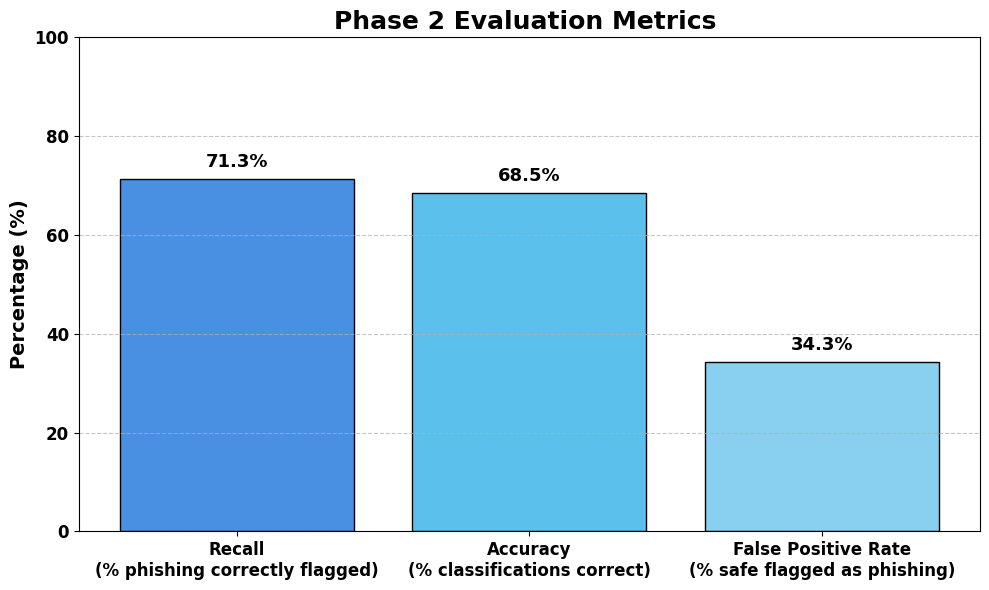

In [58]:
# Step 1: Find student answer columns
student_answer_columns = [
    col for col in df_phase2.columns
    if 'Question' in col and '[Score]' not in col and '[Feedback]' not in col
][:12]

# Step 2: Map selections ("Phishing" -> 1, "Safe" -> 0)
student_predictions = []
for col in student_answer_columns:
    mapped = df_phase2[col].apply(lambda x: 1 if str(x).strip().lower() == 'phishing' else 0)
    student_predictions.append(mapped)

# Step 3: Create predictions DataFrame
student_predictions_df = pd.DataFrame(student_predictions).T
student_predictions_df.columns = [f"Q{i+1}" for i in range(12)]

# Step 4: Expand groundTruth
y_true = []
y_pred = []
for idx, row in student_predictions_df.iterrows():
    for i in range(12):
        y_true.append(groundTruth2[i])
        y_pred.append(row[f"Q{i+1}"])

# Step 5: Calculate metrics
recall = recall_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
false_positive_rate = fp / (fp + tn)

# Step 6: Define metrics and labels
metrics = [
    'Recall\n(% phishing correctly flagged)',
    'Accuracy\n(% classifications correct)',
    'False Positive Rate\n(% safe flagged as phishing)'
]
values = [recall, accuracy, false_positive_rate]
colors = ['#4A90E2', '#5BC0EB', '#89CFF0']

# Step 7: Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, [v * 100 for v in values], color=colors, edgecolor='black')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 6),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=13, fontweight='bold')

# Style text and axes
plt.title('Phase 2 Evaluation Metrics ', fontsize=18, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save to file
plt.savefig('phase2_simplified_evaluation_metrics.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

Average Total Score: 65.74
Median Total Score: 64.00
Min Total Score: 24.00
Max Total Score: 96.00
Standard Deviation: 15.87


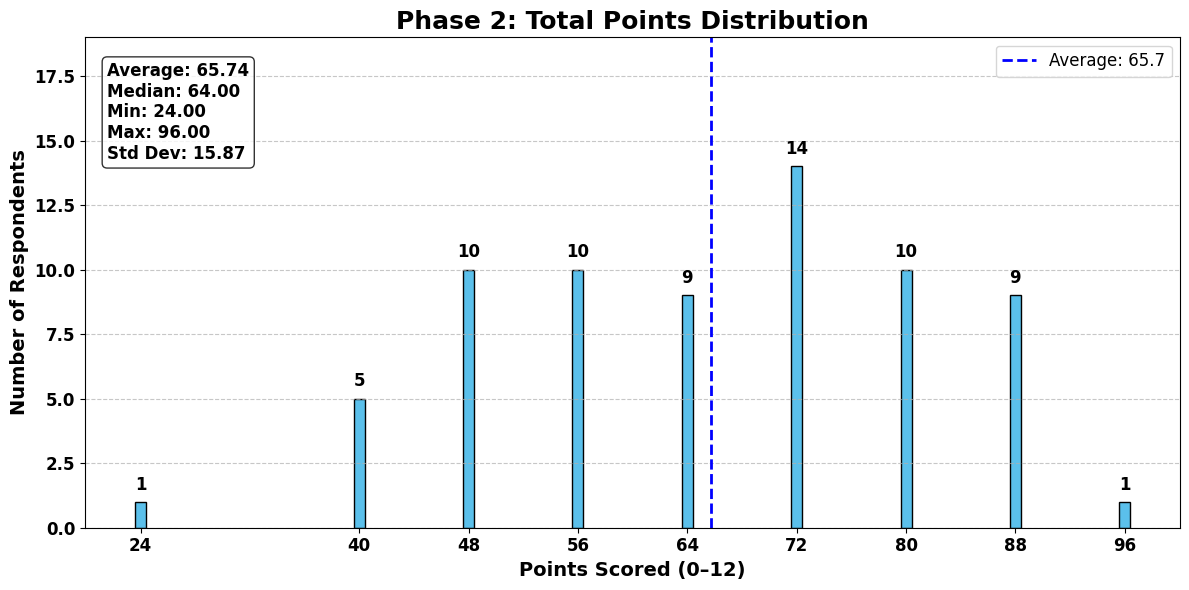

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Find the [Score] columns for Q1–Q12
score_columns = [col for col in df_phase2.columns if '[Score]' in col and 'Question' in col][:12]

# Step 2: Clean and extract points earned
student_scores = []
for col in score_columns:
    cleaned_scores = df_phase2[col].apply(lambda x: float(str(x).split('/')[0].strip()))
    student_scores.append(cleaned_scores)

# Step 3: Create DataFrame (students x questions)
student_scores_df = pd.DataFrame(student_scores).T
student_scores_df.columns = [f"Q{i+1}" for i in range(12)]

# Step 4: Calculate total points
student_scores_df['Total Points'] = student_scores_df.sum(axis=1)

# Step 5: Compute statistics
total_points = student_scores_df['Total Points']
average_score = total_points.mean()
median_score = total_points.median()
min_score = total_points.min()
max_score = total_points.max()
std_dev_score = total_points.std()

print(f"Average Total Score: {average_score:.2f}")
print(f"Median Total Score: {median_score:.2f}")
print(f"Min Total Score: {min_score:.2f}")
print(f"Max Total Score: {max_score:.2f}")
print(f"Standard Deviation: {std_dev_score:.2f}")

# Step 6: Prepare data for bar plot
score_counts = total_points.value_counts().sort_index()

# Step 7: Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(score_counts.index, score_counts.values, color='#5BC0EB', edgecolor='black')

# Titles and axis labels with larger, bold font
plt.title('Phase 2: Total Points Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Points Scored (0–12)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Respondents', fontsize=14, fontweight='bold')

plt.xticks(score_counts.index, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add average line
plt.axvline(average_score, color='blue', linestyle='dashed', linewidth=2,
            label=f'Average: {average_score:.1f}')
plt.legend(fontsize=12)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 6),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, fontweight='bold')

# Stats summary box
stats_text = (
    f"Average: {average_score:.2f}\n"
    f"Median: {median_score:.2f}\n"
    f"Min: {min_score:.2f}\n"
    f"Max: {max_score:.2f}\n"
    f"Std Dev: {std_dev_score:.2f}"
)
plt.gca().text(0.02, 0.95, stats_text, transform=plt.gca().transAxes,
               fontsize=12, fontweight='bold', verticalalignment='top',
               bbox=dict(boxstyle="round", facecolor='white', edgecolor='black', alpha=0.8))

plt.ylim(0, max(score_counts.values) + 5)
plt.tight_layout()
plt.savefig('phase2_total_score_distribution.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

Average Confidence (Correct Answers): 3.24 / 5
Average Confidence (Wrong Answers): 3.11 / 5


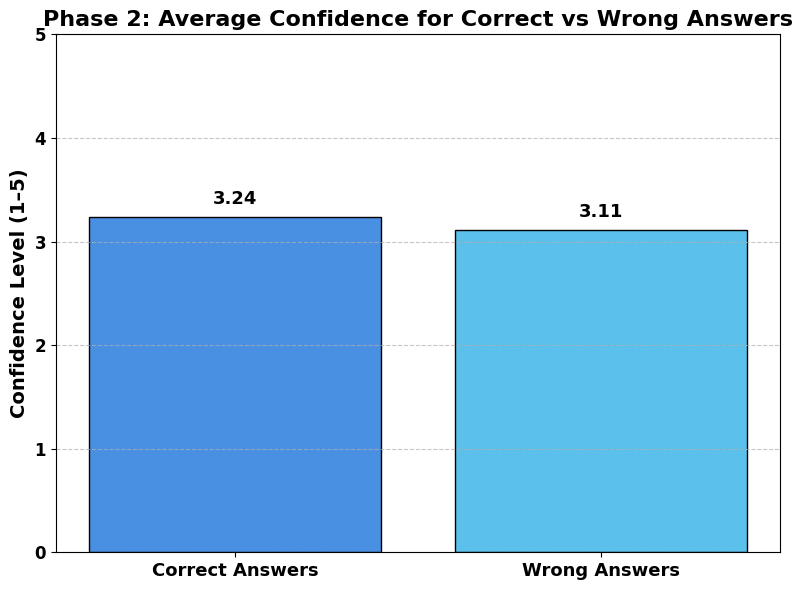

In [56]:
# Step 1: Extract only real confidence columns (no [Score])
confidence_columns = [
    col for col in df_phase2.columns
    if 'tell us how confident' in col.lower()
    and 'question' in col.lower()
    and '[score]' not in col.lower()
][:12]

# Step 2: Extract answer [Score] columns
score_columns = [
    col for col in df_phase2.columns
    if '[score]' in col.lower() and 'question' in col.lower()
][:12]

# Step 3: Clean and extract scores
student_scores = []
for col in score_columns:
    def extract_score(x):
        parts = str(x).split('/')
        if len(parts) == 2:
            earned = float(parts[0].strip())
            total = float(parts[1].strip())
            return 1 if earned == total else 0
        return 0
    cleaned = df_phase2[col].apply(extract_score)
    student_scores.append(cleaned)

# Build student_answers DataFrame
student_answers_df = pd.DataFrame(student_scores).T
student_answers_df.columns = [f"Q{i+1}" for i in range(12)]

# Step 4: Extract and clean confidence scores
student_confidence = []
for col in confidence_columns:
    def clean_confidence(x):
        try:
            first_part = str(x).split('/')[0].strip()
            return float(first_part)
        except:
            return None
    cleaned_conf = df_phase2[col].apply(clean_confidence)
    student_confidence.append(cleaned_conf)

# Build student_confidence DataFrame
student_confidence_df = pd.DataFrame(student_confidence).T
student_confidence_df.columns = [f"Q{i+1}" for i in range(12)]

# Step 5: Compare confidence for correct vs wrong answers
correct_confidences = []
wrong_confidences = []

for idx, row in student_answers_df.iterrows():
    for i in range(12):
        conf = student_confidence_df.loc[idx, f"Q{i+1}"]
        correct = row[f"Q{i+1}"]

        if pd.notna(conf):
            if correct == 1:
                correct_confidences.append(conf)
            else:
                wrong_confidences.append(conf)

# Step 6: Calculate average confidence
average_correct_confidence = sum(correct_confidences) / len(correct_confidences)
average_wrong_confidence = sum(wrong_confidences) / len(wrong_confidences)

print(f"Average Confidence (Correct Answers): {average_correct_confidence:.2f} / 5")
print(f"Average Confidence (Wrong Answers): {average_wrong_confidence:.2f} / 5")

# Step 7: Plot
labels = ['Correct Answers', 'Wrong Answers']
confidences = [average_correct_confidence, average_wrong_confidence]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, confidences, color=['#4A90E2', '#5BC0EB'], edgecolor='black')

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 6),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=13, fontweight='bold')

# Style plot text
plt.title('Phase 2: Average Confidence for Correct vs Wrong Answers',
          fontsize=16, fontweight='bold')
plt.ylabel('Confidence Level (1–5)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('phase2_confidence_correct_vs_wrong.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

Total Wrong Answers: 261
Overconfident Wrong Answers: 93
Overconfidence Rate: 35.63%


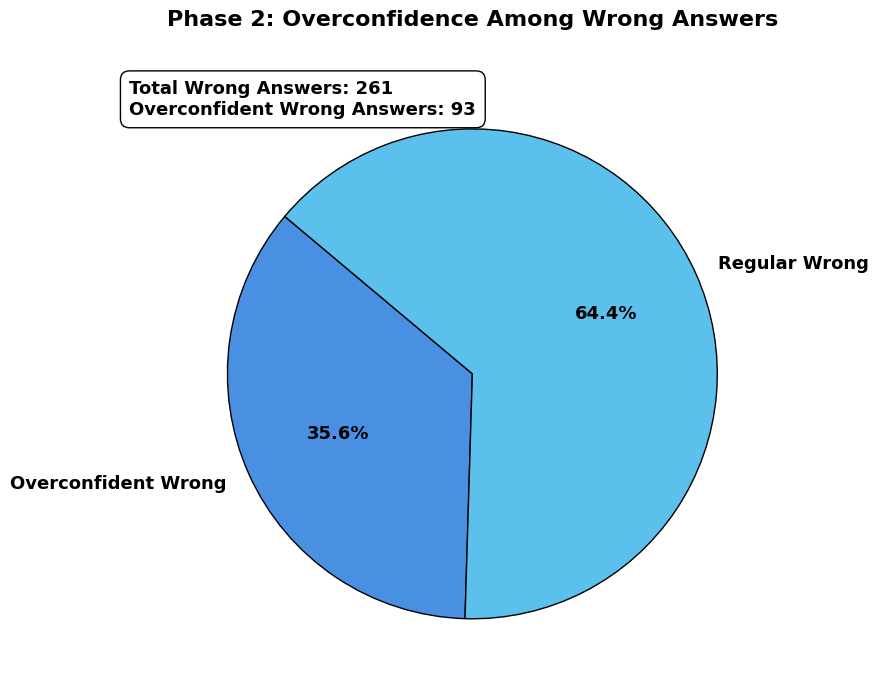

In [55]:
# Step 1: Extract only real confidence columns (no [Score])
confidence_columns = [
    col for col in df_phase2.columns
    if 'tell us how confident' in col.lower()
    and 'question' in col.lower()
    and '[score]' not in col.lower()
]

# Step 2: Extract only score columns
score_columns = [
    col for col in df_phase2.columns
    if '[score]' in col.lower() and 'question' in col.lower()
]

# Step 3: Clean and extract scores (Correct = 1, Wrong = 0)
student_scores = []
for col in score_columns:
    def extract_score(x):
        parts = str(x).split('/')
        if len(parts) == 2:
            earned = float(parts[0].strip())
            total = float(parts[1].strip())
            return 1 if earned == total else 0
        return 0
    cleaned = df_phase2[col].apply(extract_score)
    student_scores.append(cleaned)

student_answers_df = pd.DataFrame(student_scores).T
student_answers_df.columns = [f"Q{i+1}" for i in range(len(score_columns))]

# Step 4: Clean and extract confidence values
student_confidence = []
for col in confidence_columns:
    def clean_confidence(x):
        try:
            first_part = str(x).split('/')[0].strip()
            return float(first_part)
        except:
            return None
    cleaned_conf = df_phase2[col].apply(clean_confidence)
    student_confidence.append(cleaned_conf)

student_confidence_df = pd.DataFrame(student_confidence).T
student_confidence_df.columns = [f"Q{i+1}" for i in range(len(confidence_columns))]

# Step 5: Find overconfident wrong answers
overconfident_wrong = 0
total_wrong = 0

common_columns = list(set(student_answers_df.columns) & set(student_confidence_df.columns))
common_columns.sort()

for idx, row in student_answers_df.iterrows():
    for col in common_columns:
        conf = student_confidence_df.loc[idx, col]
        correct = row[col]

        if pd.notna(conf):
            if correct == 0:
                total_wrong += 1
                if conf >= 4:
                    overconfident_wrong += 1

# Step 6: Calculate Overconfidence Rate
if total_wrong > 0:
    overconfidence_rate = (overconfident_wrong / total_wrong) * 100
else:
    overconfidence_rate = 0

print(f"Total Wrong Answers: {total_wrong}")
print(f"Overconfident Wrong Answers: {overconfident_wrong}")
print(f"Overconfidence Rate: {overconfidence_rate:.2f}%")

# Step 7: Plot pie chart with larger, bold text
labels = ['Overconfident Wrong', 'Regular Wrong']
sizes = [overconfident_wrong, total_wrong - overconfident_wrong]
colors = ['#4A90E2', '#5BC0EB']

plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 13, 'fontweight': 'bold'}
)

# Step 8: Add summary box in top-left corner
summary_text = (
    f"Total Wrong Answers: {total_wrong}\n"
    f"Overconfident Wrong Answers: {overconfident_wrong}"
)

plt.gca().text(-1.4, 1.2, summary_text,
               ha='left', va='top', fontsize=13, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.5", facecolor='white', edgecolor='black'))

plt.title('Phase 2: Overconfidence Among Wrong Answers', pad=30, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('phase2_overconfidence_wrong_answers.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Phase 1 VS Phase 2 Improvements

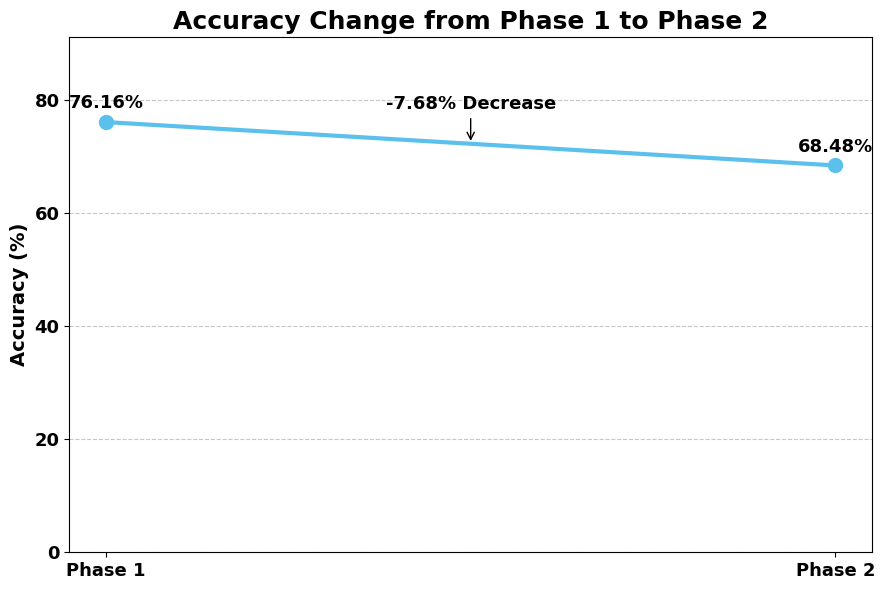

Phase 1 Accuracy: 76.16%
Phase 2 Accuracy: 68.48%
Improvement: -7.68%


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# === Phase 1 Setup ===
GroundTruth1 = [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]

student_answer_columns_phase1 = [
    col for col in df_phase1.columns
    if 'Question' in col and '[Score]' not in col and '[Feedback]' not in col
][:12]

student_predictions_phase1 = []
for col in student_answer_columns_phase1:
    mapped = df_phase1[col].apply(lambda x: 1 if str(x).strip().lower() == 'phishing' else 0)
    student_predictions_phase1.append(mapped)

student_predictions_df_phase1 = pd.DataFrame(student_predictions_phase1).T
student_predictions_df_phase1.columns = [f"Q{i+1}" for i in range(12)]

y_true_phase1 = []
y_pred_phase1 = []

for idx, row in student_predictions_df_phase1.iterrows():
    for i in range(12):
        y_true_phase1.append(GroundTruth1[i])
        y_pred_phase1.append(row[f"Q{i+1}"])

# === Phase 2 Setup ===
GroundTruth2 = [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]

student_answer_columns_phase2 = [
    col for col in df_phase2.columns
    if 'Question' in col and '[Score]' not in col and '[Feedback]' not in col
][:12]

student_predictions_phase2 = []
for col in student_answer_columns_phase2:
    mapped = df_phase2[col].apply(lambda x: 1 if str(x).strip().lower() == 'phishing' else 0)
    student_predictions_phase2.append(mapped)

student_predictions_df_phase2 = pd.DataFrame(student_predictions_phase2).T
student_predictions_df_phase2.columns = [f"Q{i+1}" for i in range(12)]

y_true_phase2 = []
y_pred_phase2 = []

for idx, row in student_predictions_df_phase2.iterrows():
    for i in range(12):
        y_true_phase2.append(GroundTruth2[i])
        y_pred_phase2.append(row[f"Q{i+1}"])

# === Calculate Accuracies ===
accuracy_phase1 = accuracy_score(y_true_phase1, y_pred_phase1) * 100
accuracy_phase2 = accuracy_score(y_true_phase2, y_pred_phase2) * 100
improvement = accuracy_phase2 - accuracy_phase1

# === Plot Line Chart ===
phases = ['Phase 1', 'Phase 2']
accuracies = [accuracy_phase1, accuracy_phase2]

plt.figure(figsize=(9, 6))
plt.plot(phases, accuracies, marker='o', linestyle='-', color='#5BC0EB', linewidth=3, markersize=10)

# Annotate points
for i, acc in enumerate(accuracies):
    plt.annotate(f'{acc:.2f}%',
                 (phases[i], acc),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center',
                 fontsize=13,
                 fontweight='bold')

# Annotate improvement arrow
mid_x = 0.5
mid_y = (accuracy_phase1 + accuracy_phase2) / 2
improvement_text = f'+{improvement:.2f}% Improvement' if improvement >= 0 else f'{improvement:.2f}% Decrease'

plt.annotate(improvement_text,
             xy=(mid_x, mid_y),
             xytext=(0, 25),
             textcoords="offset points",
             ha='center',
             fontsize=13,
             fontweight='bold',
             arrowprops=dict(arrowstyle="->", color='black'))

# Plot style
plt.title('Accuracy Change from Phase 1 to Phase 2', fontsize=18, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.ylim(0, max(accuracies) + 15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save
plt.savefig('phase1_vs_phase2_accuracy_lineplot.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary
print(f"Phase 1 Accuracy: {accuracy_phase1:.2f}%")
print(f"Phase 2 Accuracy: {accuracy_phase2:.2f}%")
print(f"Improvement: {improvement:.2f}%")

In [67]:
# Load all datasets
phase0_path = "Phase 0 .csv"
phase1_path = "Phase 1.csv"
phase2_path = "Phase 2.csv"

df_phase0 = pd.read_csv(phase0_path)
df_phase1 = pd.read_csv(phase1_path)
df_phase2 = pd.read_csv(phase2_path)

General Awareness (Total Phase 0 Score): 97.11%
Overall Phase 1 Accuracy: 76.16%
Overall Phase 2 Accuracy: 68.48%


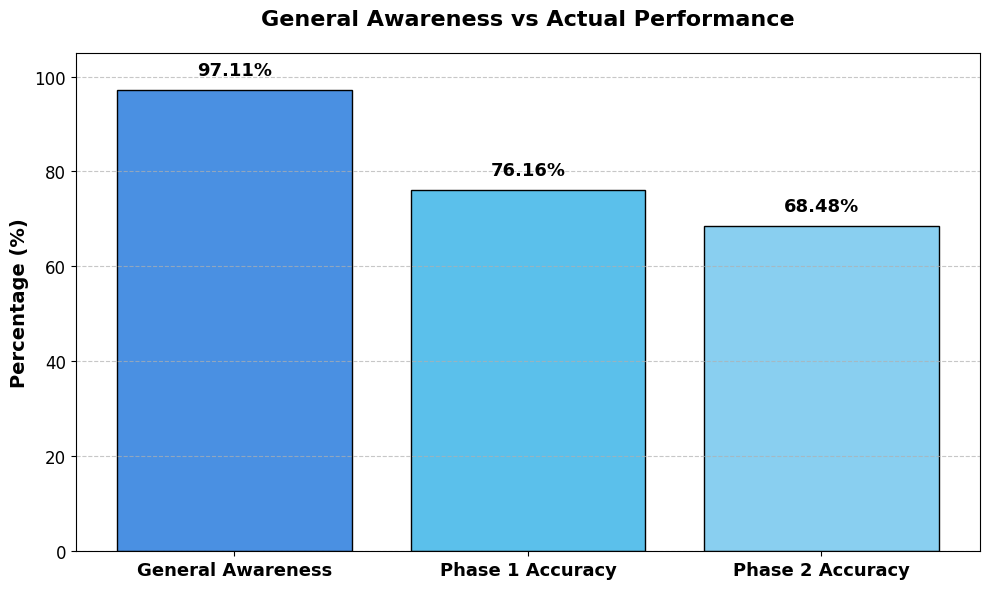

In [70]:
# === Step 1: Awareness Based on Entire Phase 0 (Total Score)
earned_scores = df_phase0['Total score'].apply(lambda x: float(str(x).split('/')[0].strip()))
total_scores = df_phase0['Total score'].apply(lambda x: float(str(x).split('/')[1].strip()))
student_awareness_scores = (earned_scores / total_scores) * 100
general_awareness_percent = student_awareness_scores.mean()

# === Step 2: Phase 1 Setup
GroundTruth1 = [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]

student_answer_columns_phase1 = [
    col for col in df_phase1.columns
    if 'Question' in col and '[Score]' not in col and '[Feedback]' not in col
][:12]

student_predictions_phase1 = []
for col in student_answer_columns_phase1:
    mapped = df_phase1[col].apply(lambda x: 1 if str(x).strip().lower() == 'phishing' else 0)
    student_predictions_phase1.append(mapped)

student_predictions_df_phase1 = pd.DataFrame(student_predictions_phase1).T
student_predictions_df_phase1.columns = [f"Q{i+1}" for i in range(12)]

def row_accuracy(row_preds, ground_truth):
    correct = sum([1 for i in range(len(ground_truth)) if row_preds[f"Q{i+1}"] == ground_truth[i]])
    return (correct / len(ground_truth)) * 100

phase1_accuracies = student_predictions_df_phase1.apply(lambda row: row_accuracy(row, GroundTruth1), axis=1)
overall_phase1_accuracy = phase1_accuracies.mean()

# === Step 3: Phase 2 Setup
GroundTruth2 = [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]

student_answer_columns_phase2 = [
    col for col in df_phase2.columns
    if 'Question' in col and '[Score]' not in col and '[Feedback]' not in col
][:12]

student_predictions_phase2 = []
for col in student_answer_columns_phase2:
    mapped = df_phase2[col].apply(lambda x: 1 if str(x).strip().lower() == 'phishing' else 0)
    student_predictions_phase2.append(mapped)

student_predictions_df_phase2 = pd.DataFrame(student_predictions_phase2).T
student_predictions_df_phase2.columns = [f"Q{i+1}" for i in range(12)]

phase2_accuracies = student_predictions_df_phase2.apply(lambda row: row_accuracy(row, GroundTruth2), axis=1)
overall_phase2_accuracy = phase2_accuracies.mean()

# === Step 4: Print Results
print(f"General Awareness (Total Phase 0 Score): {general_awareness_percent:.2f}%")
print(f"Overall Phase 1 Accuracy: {overall_phase1_accuracy:.2f}%")
print(f"Overall Phase 2 Accuracy: {overall_phase2_accuracy:.2f}%")

# === Step 5: Plot Bar Chart
labels = ['General Awareness', 'Phase 1 Accuracy', 'Phase 2 Accuracy']
values = [general_awareness_percent, overall_phase1_accuracy, overall_phase2_accuracy]
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x, values, color=['#4A90E2', '#5BC0EB', '#89CFF0'], edgecolor='black')

# Set higher y-limit to give space for labels
plt.ylim(0, 105)

# Add percentage labels above bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 8),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=13, fontweight='bold')

# Style plot text
ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')
ax.set_title('General Awareness vs Actual Performance',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=13, fontweight='bold')
ax.tick_params(axis='y', labelsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('general_awareness_vs_performance.png', format='png', dpi=300, bbox_inches='tight')
plt.show()